In [ ]:
import pandas as pd

df = pd.read_csv('dataset/milknew.csv')

print(df.head())

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB
None


In [3]:
df = df.rename(columns={'Temprature': 'Temperature'})
df = df.rename(columns={'Fat ': 'Fat'})
print(df.columns)

Index(['pH', 'Temperature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')


In [4]:
print(df.describe())

                pH  Temperature        Taste         Odor          Fat  \
count  1059.000000  1059.000000  1059.000000  1059.000000  1059.000000   
mean      6.630123    44.226629     0.546742     0.432483     0.671388   
std       1.399679    10.098364     0.498046     0.495655     0.469930   
min       3.000000    34.000000     0.000000     0.000000     0.000000   
25%       6.500000    38.000000     0.000000     0.000000     0.000000   
50%       6.700000    41.000000     1.000000     0.000000     1.000000   
75%       6.800000    45.000000     1.000000     1.000000     1.000000   
max       9.500000    90.000000     1.000000     1.000000     1.000000   

         Turbidity       Colour  
count  1059.000000  1059.000000  
mean      0.491029   251.840415  
std       0.500156     4.307424  
min       0.000000   240.000000  
25%       0.000000   250.000000  
50%       0.000000   255.000000  
75%       1.000000   255.000000  
max       1.000000   255.000000  


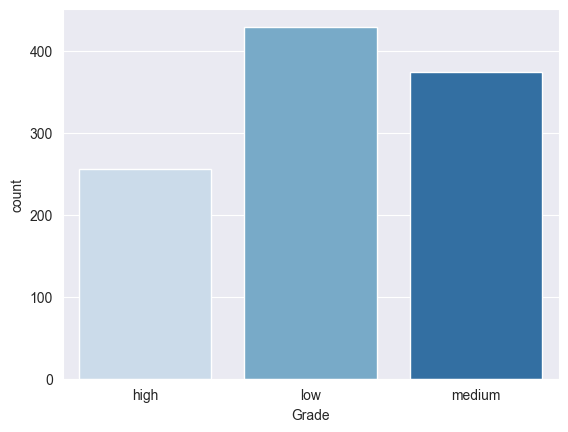

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Grade", data=df, palette="Blues")
plt.show()

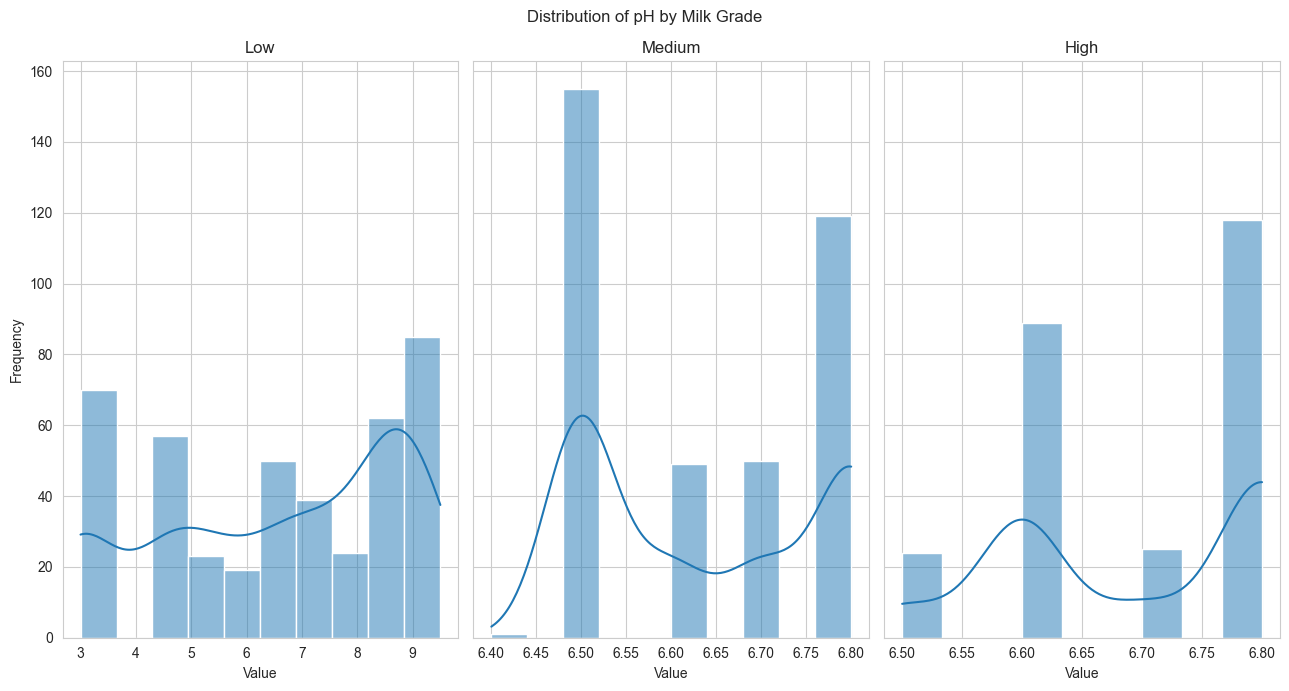

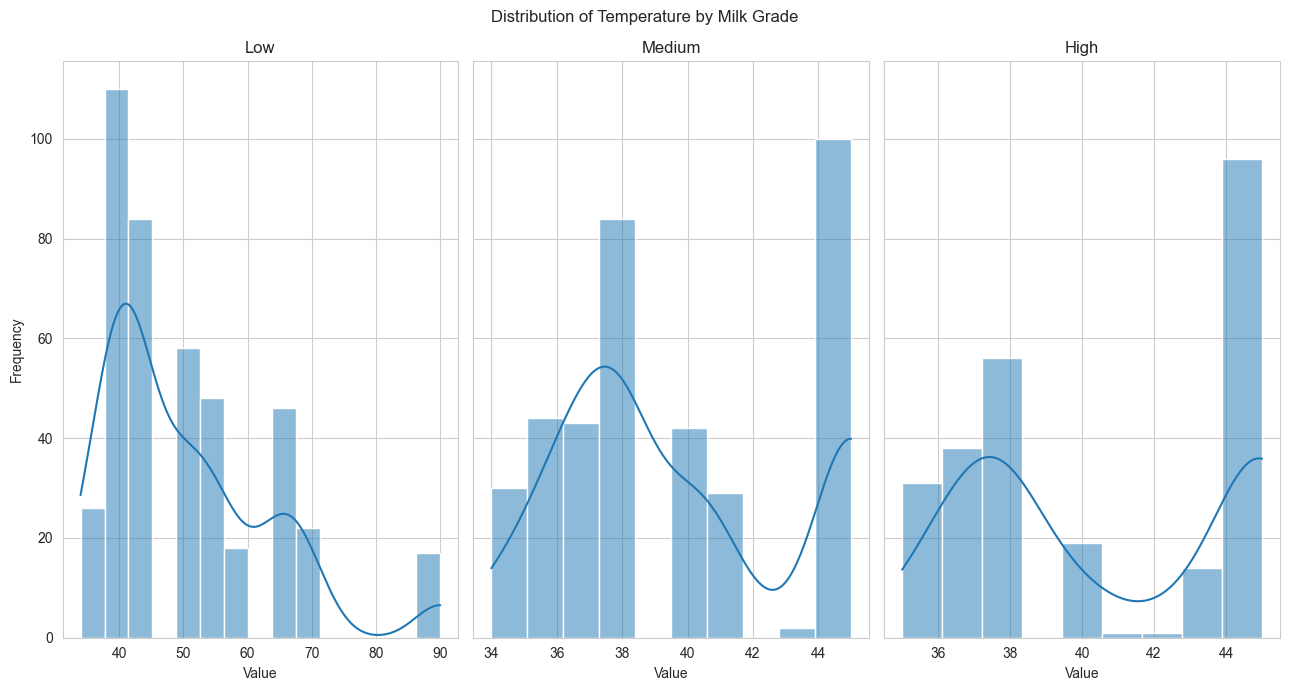

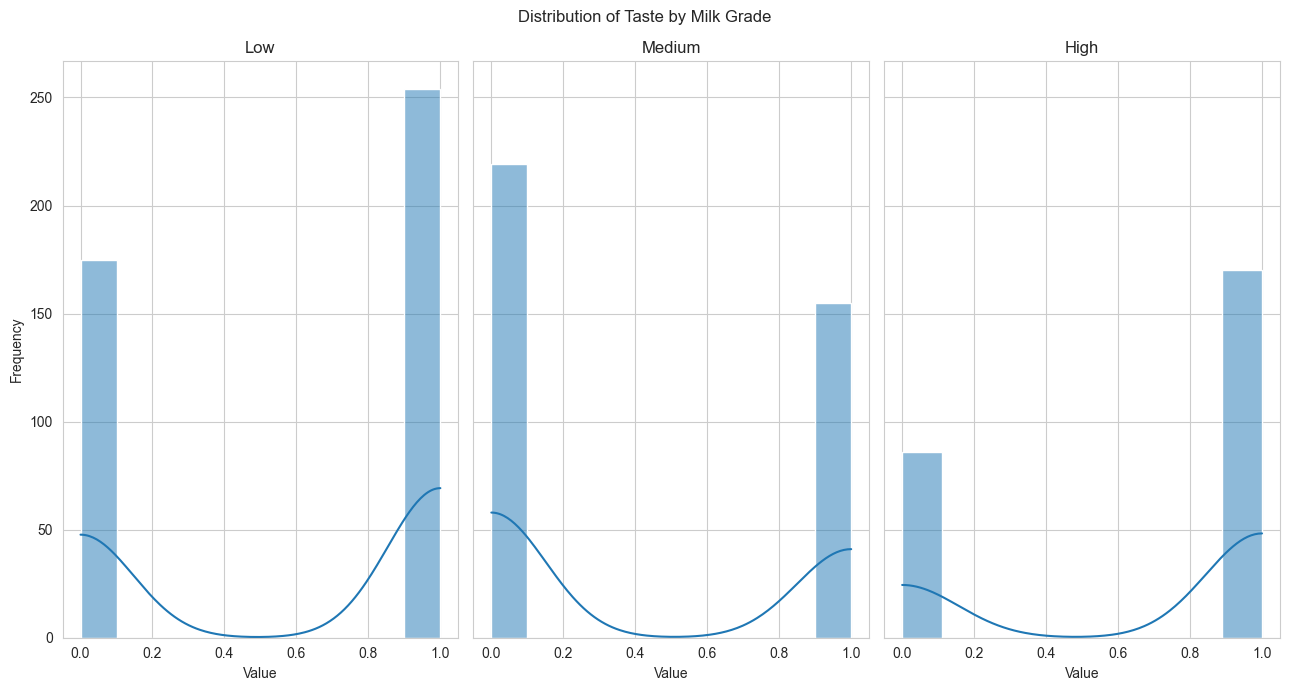

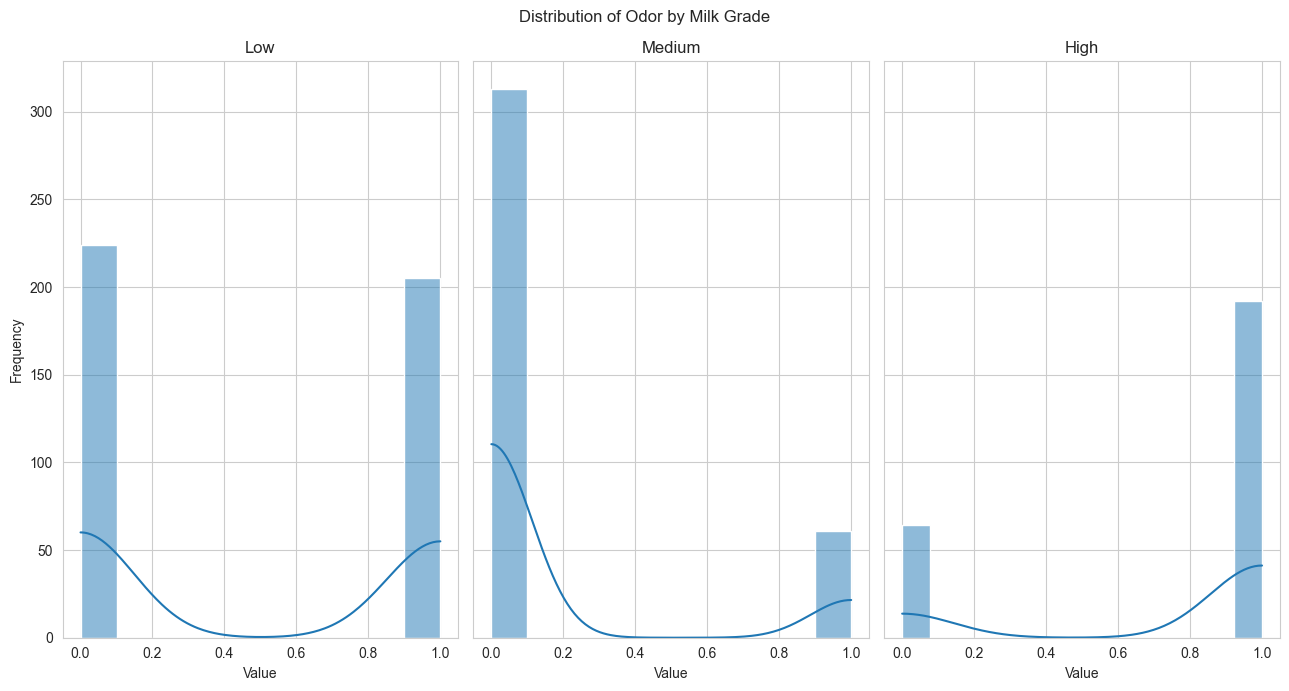

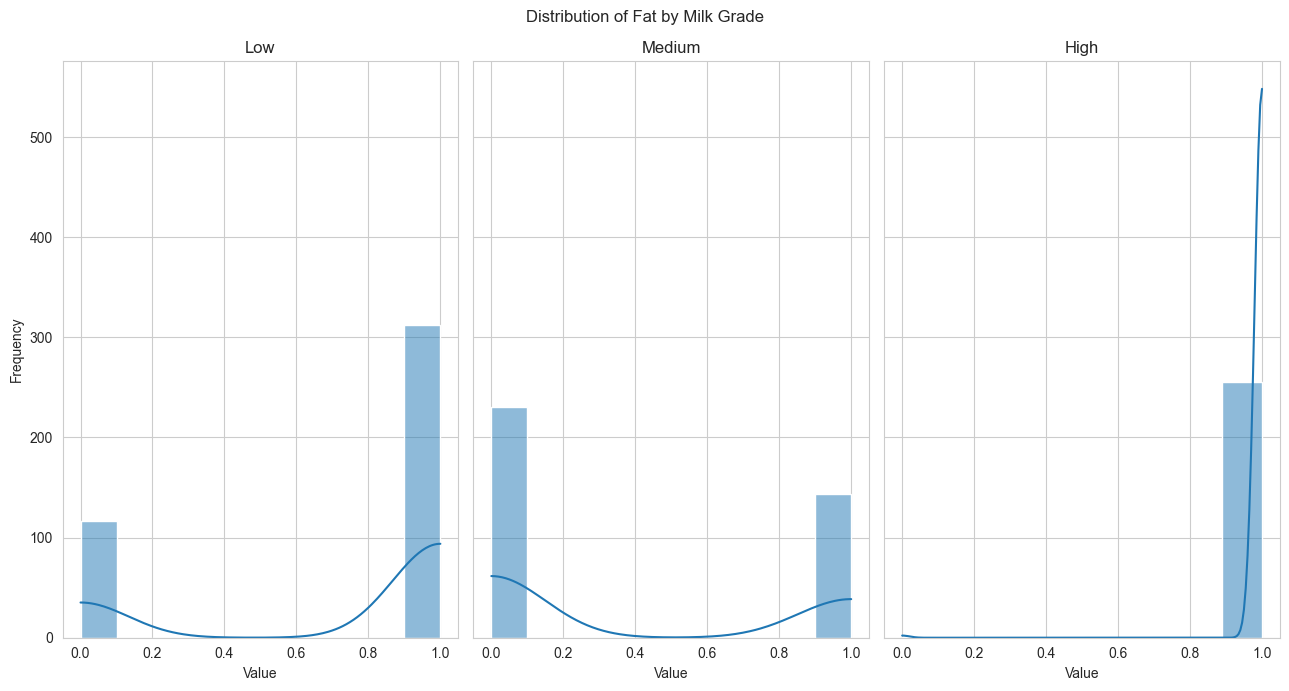

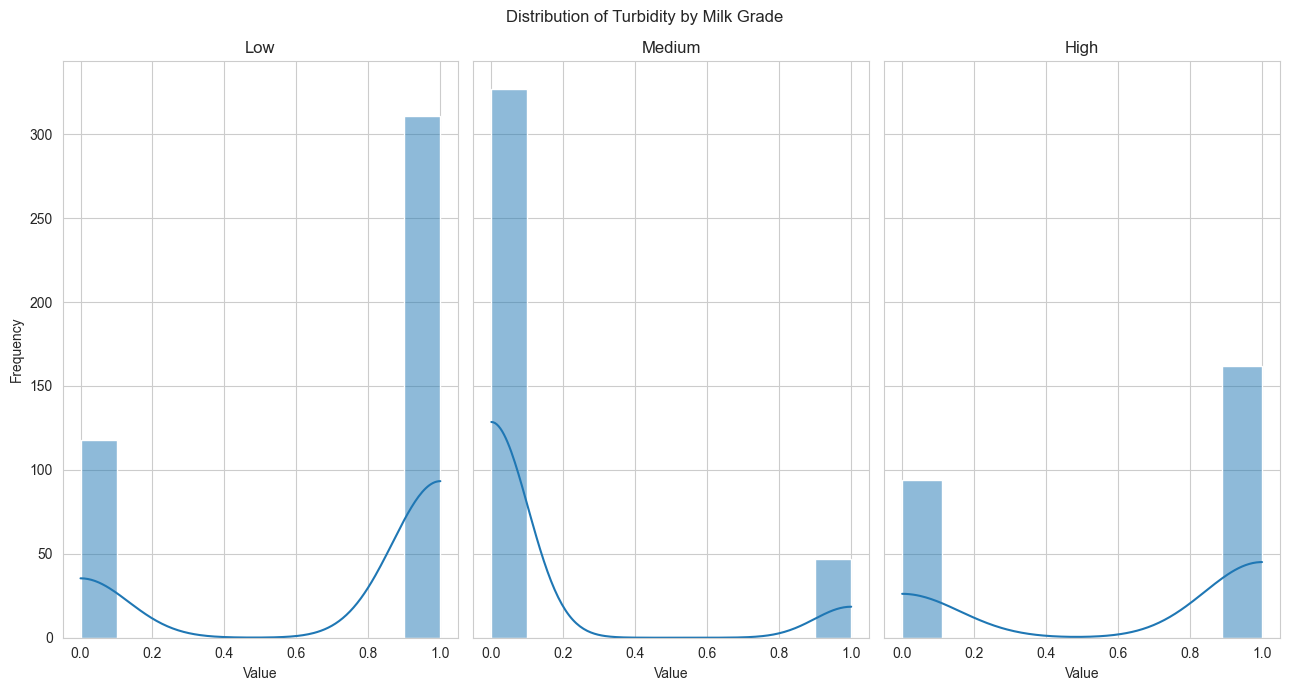

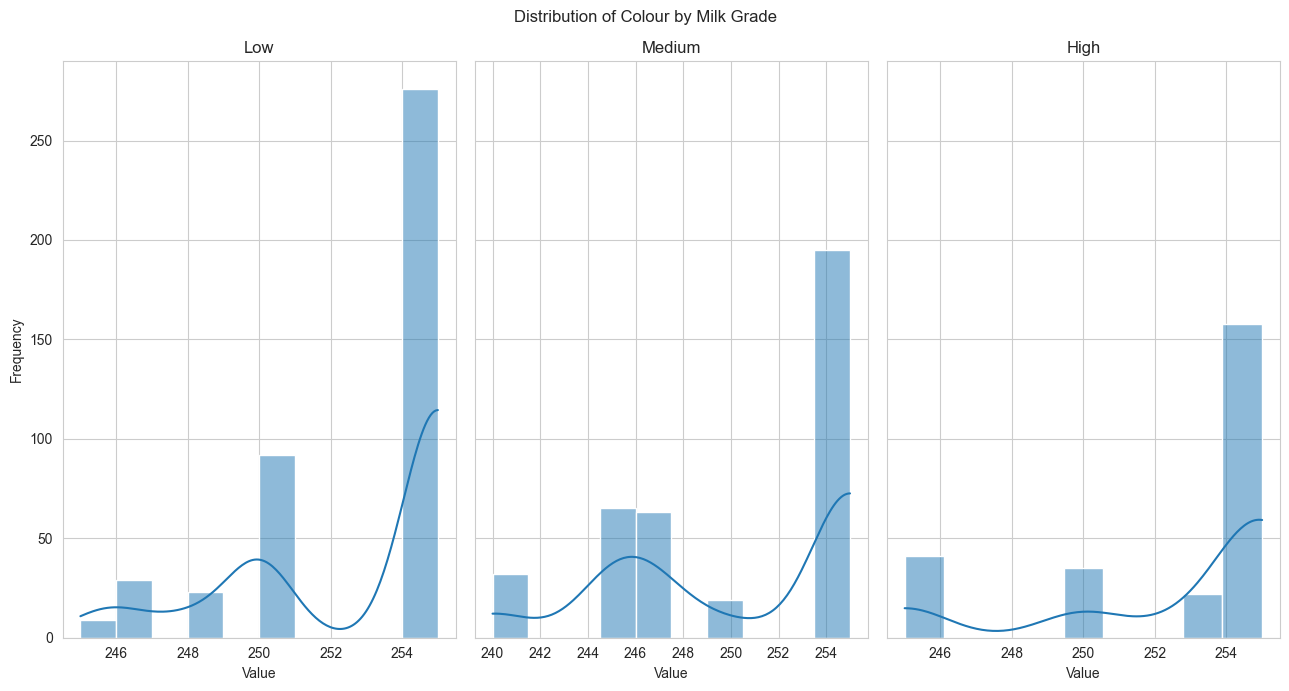

In [6]:
sns.set_style("whitegrid")

for parameter in df.columns[:-1]:
    fig, axs = plt.subplots(figsize=(13, 7), nrows=1, ncols=3, sharey=True)
    fig.suptitle('Distribution of {} by Milk Grade'.format(parameter))

    for i, grade in enumerate(['low', 'medium', 'high']):
        data_grade = df[df['Grade'] == grade]
        sns.histplot(data=data_grade[parameter], kde=True, ax=axs[i])
        axs[i].set_xlabel('Value')
        axs[i].set_ylabel('Frequency')
        axs[i].set_title(grade.capitalize())

    plt.tight_layout()
    plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('Grade', axis=1)
y = df['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

train_predictions_dtc = dtc.predict(X_train)
test_predictions_dtc = dtc.predict(X_test)

train_accuracy_dtc = accuracy_score(y_train, train_predictions_dtc)
test_accuracy_dtc = accuracy_score(y_test, test_predictions_dtc)

print("[DTC] Training Accuracy:", train_accuracy_dtc)
print("[DTC] Test Accuracy:", test_accuracy_dtc)

[DTC] Training Accuracy: 1.0
[DTC] Test Accuracy: 0.9905660377358491


In [9]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
test_prediction_rfc = rfc.predict(X_test)
train_prediction_rfc = rfc.predict(X_train)

test_accuracy_rfc = accuracy_score(y_test, test_prediction_rfc)
train_accuracy_rfc = accuracy_score(y_train, train_prediction_rfc)
print("[RFC] Training Accuracy:", train_accuracy_rfc)
print("[RFC] Test Accuracy:", test_accuracy_rfc)

[RFC] Training Accuracy: 1.0
[RFC] Test Accuracy: 0.9952830188679245


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors': range(1, 10)}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']

print("The best k value:", best_k)

The best k value: 1


In [11]:
knn = grid_search.best_estimator_
knn.fit(X_train, y_train)

train_prediction_knn = knn.predict(X_train)
test_prediction_knn = knn.predict(X_test)

train_accuracy_knn = accuracy_score(train_prediction_knn, y_train)
test_accuracy_knn = accuracy_score(test_prediction_knn, y_test)

print("[KNN] Training Accuracy:", train_accuracy_knn)
print("[KNN] Test Accuracy:", test_accuracy_knn)

[KNN] Training Accuracy: 1.0
[KNN] Test Accuracy: 0.9905660377358491


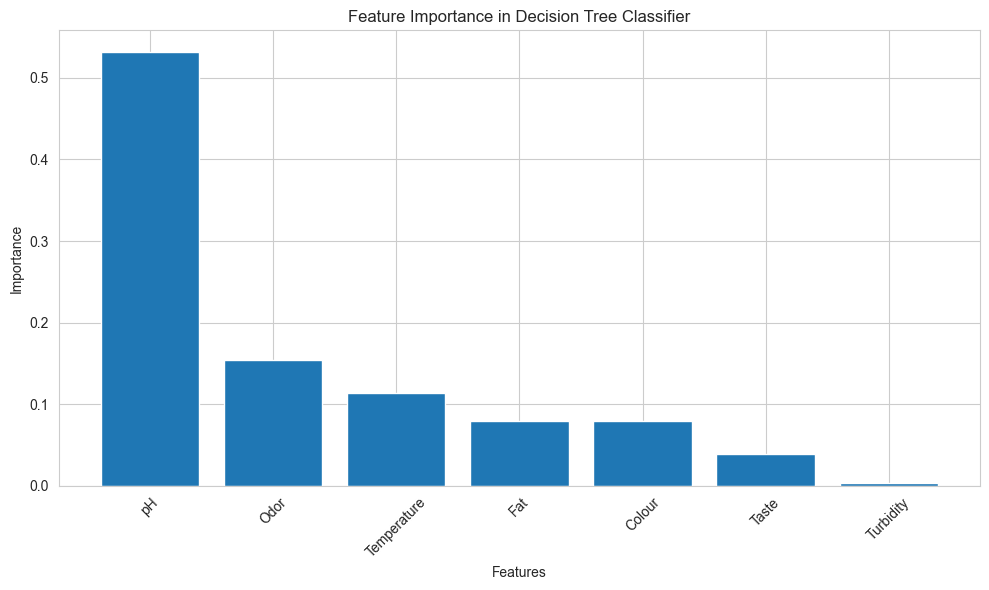

In [12]:
dtree_importance = dtc.feature_importances_
sorted_indices = np.argsort(dtree_importance)[::-1]
sorted_importance = dtree_importance[sorted_indices]

feature_labels = ['pH', 'Temperature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']

plt.figure(figsize=(10, 6))
plt.bar(range(len(dtree_importance)), sorted_importance, align='center')
plt.xticks(range(len(dtree_importance)), [feature_labels[i] for i in sorted_indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree Classifier')
plt.tight_layout()
plt.show()

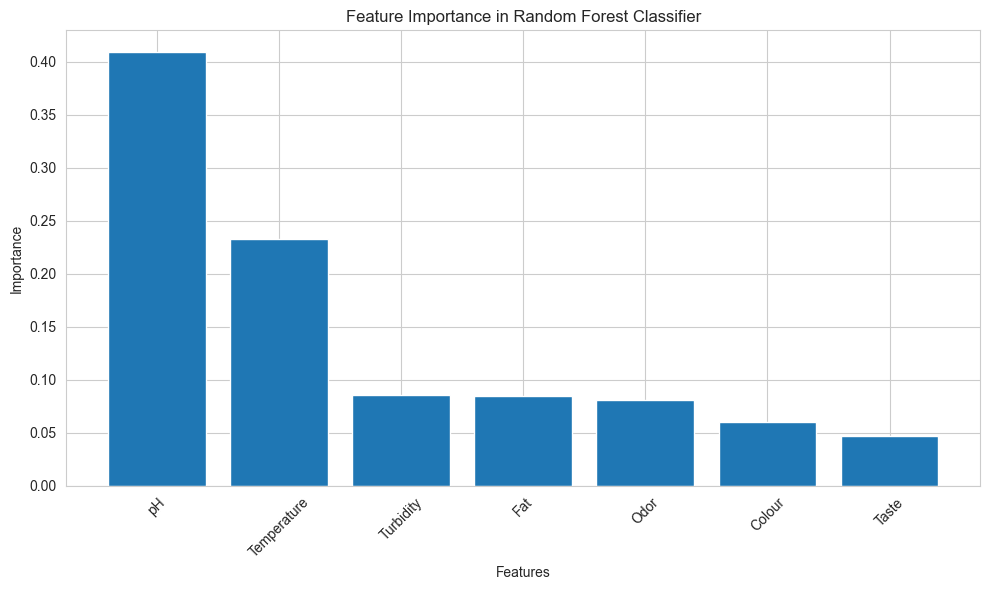

In [13]:
rfc_importance = rfc.feature_importances_

sorted_indices = np.argsort(rfc_importance)[::-1]
sorted_importance = rfc_importance[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(rfc_importance)), sorted_importance, align='center')
plt.xticks(range(len(rfc_importance)), [feature_labels[i] for i in sorted_indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.tight_layout()
plt.show()

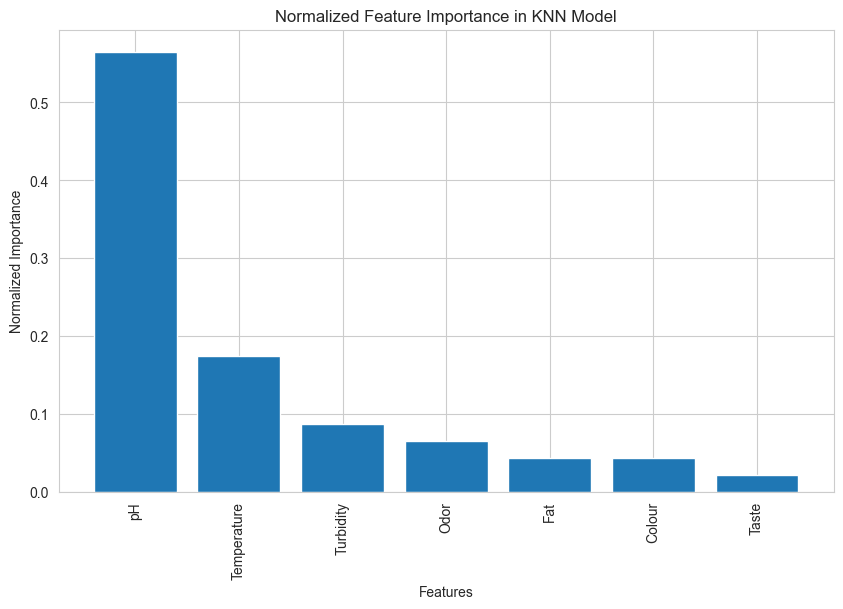

In [14]:
feature_importance = {}
for feature in X_train.columns:
    X_train_subset = X_train.drop(feature, axis=1)
    X_val_subset = X_test.drop(feature, axis=1)

    knn_subset = KNeighborsClassifier()
    knn_subset.fit(X_train_subset, y_train)
    y_pred_subset = knn_subset.predict(X_val_subset)
    accuracy_subset = accuracy_score(y_test, y_pred_subset)

    feature_importance[feature] = accuracy_score(test_prediction_knn, y_test) - accuracy_subset

sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

features = [item[0] for item in sorted_importance]
importance_values = [item[1] for item in sorted_importance]

total_importance = sum(importance_values)

normalized_importance = [importance / total_importance for importance in importance_values]

plt.figure(figsize=(10, 6))
plt.bar(features, normalized_importance)
plt.xlabel('Features')
plt.ylabel('Normalized Importance')
plt.title('Normalized Feature Importance in KNN Model')
plt.xticks(rotation=90)
plt.show()

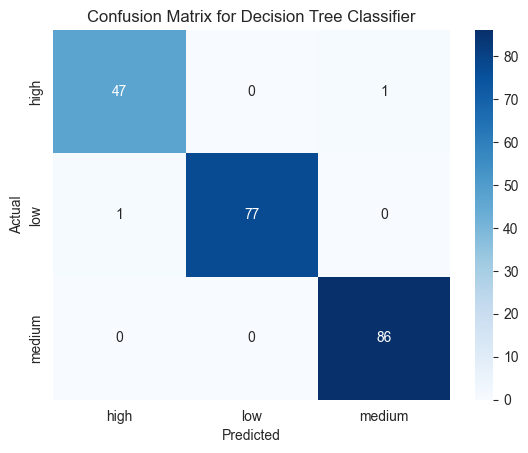

Classification report for Decision Tree Classifier:
              precision    recall  f1-score   support

        high       0.98      0.98      0.98        48
         low       1.00      0.99      0.99        78
      medium       0.99      1.00      0.99        86

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



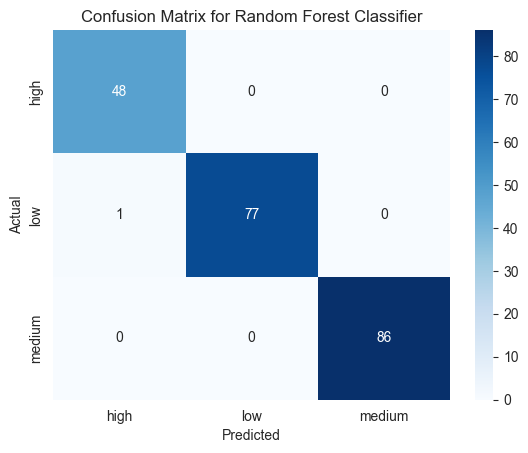

Classification report for Random Forest Classifier:
              precision    recall  f1-score   support

        high       0.98      1.00      0.99        48
         low       1.00      0.99      0.99        78
      medium       1.00      1.00      1.00        86

    accuracy                           1.00       212
   macro avg       0.99      1.00      0.99       212
weighted avg       1.00      1.00      1.00       212



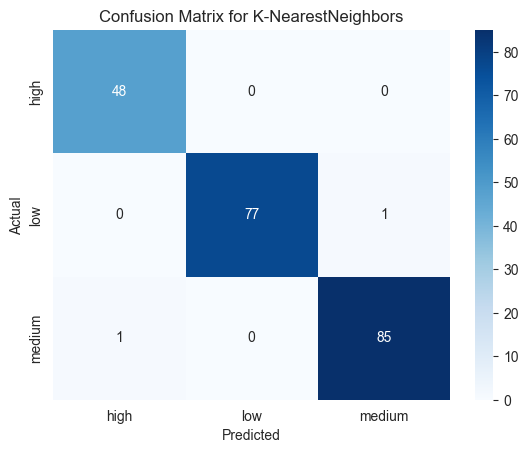

Classification report for K-NearestNeighbors:
              precision    recall  f1-score   support

        high       0.98      1.00      0.99        48
         low       1.00      0.99      0.99        78
      medium       0.99      0.99      0.99        86

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



In [15]:
from sklearn.metrics import classification_report, confusion_matrix
models = [dtc, rfc, knn]
names = ['Decision Tree Classifier', 'Random Forest Classifier', 'K-NearestNeighbors']
class_labels = ['high', 'low', 'medium']

for model, name in zip(models, names):
    cm = confusion_matrix(y_true=y_test, y_pred=model.predict(X_test))
    cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    report = classification_report(y_test, model.predict(X_test))
    print(f'Classification report for {name}:', report, sep='\n')